In [90]:
import pandas as pd
import numpy as np
import seaborn as sns


# Datos
**Fecha de creación:** 11 de diciembre de 2020<br/> 
**Último cambio:** 12 de enero de 2021<br/>
**Responsable:** Dirección Nacional de Desarrollo Tecnológico - Ministerio de Transporte
|Título de la columna |Tipo de dato |Descripción|
|:---:|:---:|:---:|
|dia_transporte| Fecha ISO-8601 (date)|día de transporte informado| 
|nombre_empresa| Texto (string)|nombre de la empresa de transporte |
|linea| Texto (string)|descripción de la línea |
|amba| Texto (string)|SI/NO |
|tipo_transporte| Texto (string)|colectivo, tren, subte, lanchas |
|jurisdiccion| Texto (string)|tipo de jurisdicción de la línea (NACIONAL, PROVINCIAL, MUNICIPAL): en caso de subte queda vacío |
|provincia| Texto (string)|nombre de la provincia, en caso de ser jurisdicción provincial o municipal.<br/> Si es jurisdicción nacional figura JN. En caso de subte queda vacío |
|municipio| Texto (string)|nombre del municipio, en caso de ser jurisdicción municipal. <br/> SI es jurisdicción nacional o provincial figura SD o SN respectivamente. En caso de subte queda vacío |
|cantidad| Número entero (integer)|cantidad de transacciones de uso / check-in / checkout sin checkin / Venta de boletos,<br/> neteadas de eventuales reversas |
|dato_preliminar| Texto (string)|SI/NO| 

In [91]:

df = pd.read_csv('sube2020.csv')
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     354067 non-null  object
 6   PROVINCIA        354067 non-null  object
 7   MUNICIPIO        354067 non-null  object
 8   CANTIDAD         356628 non-null  int64 
 9   DATO_PRELIMINAR  356628 non-null  object
dtypes: int64(1), object(9)
memory usage: 27.2+ MB


In [84]:
df.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

## Nans 
como se que en las provincias que aparecen como NaNs 
Agrupo por la columna provincia y AMBA usando la funcion groupby y que no descarte los NaNs.

In [85]:
df.groupby(['PROVINCIA','AMBA'], dropna = False).count()

DIA_TRANSPORTE  NOMBRE_EMPRESA  LINEA  TIPO_TRANSPORTE  \
PROVINCIA        AMBA                                                           
BUENOS AIRES     NO             27999           27999  27999            27999   
                 SI             87445           87445  87445            87445   
CATAMARCA        NO              5171            5171   5171             5171   
CHACO            NO              4098            4098   4098             4098   
CHUBUT           NO              5421            5421   5421             5421   
CORDOBA          NO               101             101    101              101   
CORRIENTES       NO              3190            3190   3190             3190   
ENTRE RÍOS       NO              5957            5957   5957             5957   
FORMOSA          NO              3426            3426   3426             3426   
JN               NO              2226            2226   2226             2226   
                 SI             55150           55150  55150            55150   
JUJUY            NO             19802           19802  19802            19802   
LA PAMPA         NO              2605            2605   2605             2605   
LA RIOJA         NO               672             672    672              672   
MENDOZA          NO             73880           73880  73880            73880   
NEUQUÉN          NO             11201           11201  11201            11201   
RÍO NEGRO        NO              8202            8202   8202             8202   
SAN JUAN         NO             24176           24176  24176            24176   
SAN LUIS         NO              4027            4027   4027             4027   
SANTA FE         NO              8586            8586   8586             8586   
TIERRA DEL FUEGO NO               732             732    732              732   
NaN              SI              2561            2561   2561             2561   

                       JURISDICCION  MUNICIPIO  CANTIDAD  DATO_PRELIMINAR  
PROVINCIA        AMBA                                                      
BUENOS AIRES     NO           27999      27999     27999            27999  
                 SI           87445      87445     87445            87445  
CATAMARCA        NO            5171       5171      5171             5171  
CHACO            NO            4098       4098      4098             4098  
CHUBUT           NO            5421       5421      5421             5421  
CORDOBA          NO             101        101       101              101  
CORRIENTES       NO            3190       3190      3190             3190  
ENTRE RÍOS       NO            5957       5957      5957             5957  
FORMOSA          NO            3426       3426      3426             3426  
JN               NO            2226       2226      2226             2226  
                 SI           55150      55150     55150            55150  
JUJUY            NO           19802      19802     19802            19802  
LA PAMPA         NO            2605       2605      2605             2605  
LA RIOJA         NO             672        672       672              672  
MENDOZA          NO           73880      73880     73880            73880  
NEUQUÉN          NO           11201      11201     11201            11201  
RÍO NEGRO        NO            8202       8202      8202             8202  
SAN JUAN         NO           24176      24176     24176            24176  
SAN LUIS         NO            4027       4027      4027             4027  
SANTA FE         NO            8586       8586      8586             8586  
TIERRA DEL FUEGO NO             732        732       732              732  
NaN              SI               0          0      2561             2561

Conclusion todas los NaNs que tenemos se encuntran en AMBA, Osea Buenos aires

In [89]:
df.groupby(['PROVINCIA','JURISDICCION','MUNICIPIO'], dropna = False).count()

DIA_TRANSPORTE  \
PROVINCIA        JURISDICCION MUNICIPIO                            
BUENOS AIRES     MUNICIPAL    ALMIRANTE BROWN               2554   
                              AVELLANEDA                     363   
                              BAHIA BLANCA                  5963   
                              BERAZATEGUI                    730   
                              BRANDSEN                       366   
...                                                          ...   
SANTA FE         MUNICIPAL    VILLA CONSTITUCION              58   
                 PROVINCIAL   SN                            2726   
TIERRA DEL FUEGO MUNICIPAL    RIO GRANDE                     366   
                              USHUAIA                        366   
NaN              NaN          NaN                           2561   

                                                  NOMBRE_EMPRESA  LINEA  AMBA  \
PROVINCIA        JURISDICCION MUNICIPIO                                         
BUENOS AIRES     MUNICIPAL    ALMIRANTE BROWN               2554   2554  2554   
                              AVELLANEDA                     363    363   363   
                              BAHIA BLANCA                  5963   5963  5963   
                              BERAZATEGUI                    730    730   730   
                              BRANDSEN                       366    366   366   
...                                                          ...    ...   ...   
SANTA FE         MUNICIPAL    VILLA CONSTITUCION              58     58    58   
                 PROVINCIAL   SN                            2726   2726  2726   
TIERRA DEL FUEGO MUNICIPAL    RIO GRANDE                     366    366   366   
                              USHUAIA                        366    366   366   
NaN              NaN          NaN                           2561   2561  2561   

                                                  TIPO_TRANSPORTE  CANTIDAD  \
PROVINCIA        JURISDICCION MUNICIPIO                                       
BUENOS AIRES     MUNICIPAL    ALMIRANTE BROWN                2554      2554   
                              AVELLANEDA                      363       363   
                              BAHIA BLANCA                   5963      5963   
                              BERAZATEGUI                     730       730   
                              BRANDSEN                        366       366   
...                                                           ...       ...   
SANTA FE         MUNICIPAL    VILLA CONSTITUCION               58        58   
                 PROVINCIAL   SN                             2726      2726   
TIERRA DEL FUEGO MUNICIPAL    RIO GRANDE                      366       366   
                              USHUAIA                         366       366   
NaN              NaN          NaN                            2561      2561   

                                                  DATO_PRELIMINAR  
PROVINCIA        JURISDICCION MUNICIPIO                            
BUENOS AIRES     MUNICIPAL    ALMIRANTE BROWN                2554  
                              AVELLANEDA                      363  
                              BAHIA BLANCA                   5963  
                              BERAZATEGUI                     730  
                              BRANDSEN                        366  
...                                                           ...  
SANTA FE         MUNICIPAL    VILLA CONSTITUCION               58  
                 PROVINCIAL   SN                             2726  
TIERRA DEL FUEGO MUNICIPAL    RIO GRANDE                      366  
                              USHUAIA                         366  
NaN              NaN          NaN                            2561  

[82 rows x 7 columns]

In [95]:
df.groupby(['TIPO_TRANSPORTE','NOMBRE_EMPRESA'], dropna = False).sum()

CANTIDAD
TIPO_TRANSPORTE NOMBRE_EMPRESA                      
COLECTIVO       1 DE ENERO SRL                485774
                17 DE AGOSTO S.A.            4107068
                25 DE AGOSTO SRL             1793477
                4 DE SEPTIEMBRE S.A.T.C.P.   6020717
                A T A C O NORTE S A C I       583211
...                                              ...
TREN            SOFSE - Roca                60120799
                SOFSE - San Martin          10591028
                SOFSE - TREN DEL VALLE         56682
                SOFSE- SARMIENTO            26638995
                SOFSE- TREN DE LA COSTA       182457

[273 rows x 1 columns]

<AxesSubplot:xlabel='TIPO_TRANSPORTE', ylabel='Count'>

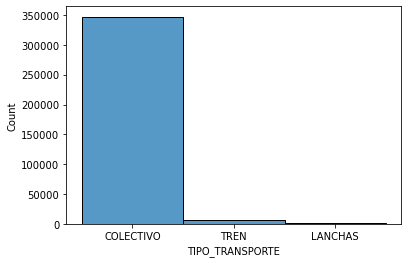

In [125]:
df_provinciana = df.dropna() 
sns.histplot(data = df_provinciana['TIPO_TRANSPORTE'])